# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

1. ¿Cuantos datos son en cada archivo?
2. ¿Qué tipo de datos tiene cada columna?
3. ¿Existen columnas con datos ausentes?
4. ¿Existen columnas repetidas en dos o mas archivos? 

Abrir los archivos con pandas, ver los encabezados con head y la informaci{on de cada archivo con info


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('./datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('./datasets/products.csv',sep=';')
df_aisles = pd.read_csv('./datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('./datasets/departments.csv',sep=';')
df_order_products = pd.read_csv('./datasets/order_products.csv',sep=';')

In [3]:
# mostrar información del DataFrame
display(df_orders.head())
print()
print(df_orders.info())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# mostrar información del DataFrame
display(df_products.head())
print()
print(df_products.info())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
# mostrar información del DataFrame
display(df_order_products.head())
print()
print(df_order_products.info())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [6]:
# mostrar información del DataFrame
display(df_aisles.head())
print()
print(df_aisles.info())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [7]:
# mostrar información del DataFrame
display(df_departments.head())
print()
print(df_departments.info())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

La tienda cuenta con 49694 productos (products.cvs), de los cuales 1258 no tienen nombre (column:pruduct_name), organizados en 21 departamentos y 134 categorías.

Han tomado 478967 ordenes (instacart_orders.csv) donde 28819 pedidos no tienen información sobre si se el cliente pidio antes o no (column:days_since_prior_order)

Además:
1. la columna de identificación de la orden (order_id) está tanto en el archivo de la ordenes recibidas como en el archivo de los productos ordenados (order_products.csv)
2. la columna de identificación del producto (product_id) está tanto en el archivo de productos como en el archivo de los productos ordenados (order_products.csv)
3. la columnas de pasillo y departamente estan ademas de en sus respectivos archivos, en el archivo de producto


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1. Buscar datos duplicados, ver que información contienen y resolver el problema 
1. Buscar datos ausentes y resolver el problema

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print(df_orders.duplicated().sum())

df_orders[df_orders.duplicated()]

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Todas son del dia miércoles a las 2

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders[(df_orders["order_dow"] ==3) & (df_orders["order_hour_of_day"]==2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Que pudieron haberse todado dobles por la hora en la que se resalizaron, por lo que se pueden eliminar.

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())


0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Habia 15 registos duplicados, tomados el mismo dia y hora y con el mismo numero de orden, que se eliminaron

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products['product_id'].duplicated().sum()


0

In [15]:
df_products['department_id'].duplicated().sum()

49673

In [16]:
df_products['product_name'].duplicated().sum()

1257

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
df_products['product_name'].duplicated().sum()

1361

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
nonan_duplic = df_products[df_products['product_name'].isna() == False]
nonan_duplic[nonan_duplic['product_name'].duplicated()].sum


<bound method DataFrame.sum of        product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       d

In [19]:
ejemplo = nonan_duplic[nonan_duplic['product_name']== 'BURRITO- STEAK & CHEESE']
ejemplo

,product_id,product_name,aisle_id,department_id
44314,44315,BURRITO- STEAK & CHEESE,38,1
49693,49694,BURRITO- STEAK & CHEESE,38,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

el archivo de productos no contiene registros totalmente duplicados pero si nombres duplicados. Se convirtieron todos los nombres a mayúsculas para poder comparar mejor y se encontraron 1361 nombres duplicados, de los cuales 1258 son NaN y 104 son nombres duplicados pero con diferente identificador del producto. hay que unificar el id


### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

### `aisles` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

### `order_products` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()


0

In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products['product_id'].duplicated().sum()


4499434

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados totales, pero si hay id de productos repetidos, ya que se pudieron haber comprado mas de una vez

In [26]:
df_order_products.duplicated(['product_id','order_id']).sum()

0

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [28]:
nan_products = df_products[df_products['product_name'].isna() == True]
nan_products

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? Si
df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.

El valor de 100 para el pasillo corresponde a productos extraviados

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? Si
df_departments[df_departments['department_id'] == 21]


,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.

El valor de 21 para el departamente corresponde a productos extraviados

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(df_aisles[df_aisles['aisle_id'] == 100])
display(df_departments[df_departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.


Hay 1258 productos desconocidos o perdidos

In [62]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknow')
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hay 1258 productos desconocidos con diferente id

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [34]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#df_orders['days_since_prior_order'].fillna(0, inplace=True)
#df_orders.isna().sum()
nan_prior = df_orders[(df_orders['days_since_prior_order'].isna() == True) & (df_orders['order_number'] != 1)]
nan_prior.count()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hay 28819 valores ausentes y todos son de clientes que pidieron por primera vez

### `order_products` data frame

In [35]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [36]:
# 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito
nan_order_products = df_order_products[df_order_products['add_to_cart_order'].isna() == True]
nan_order_products

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
max_val = df_order_products['add_to_cart_order'].max()
print(f'El número máximo de productos es: {max_val}')
min_val = df_order_products['add_to_cart_order'].min()
print(f'El número mínimo de productos es: {min_val}')

El número máximo de productos es: 64.0
El número mínimo de productos es: 1.0


Describe brevemente cuáles son tus hallazgos.

Hay un maximo de 64 productos agregados y 836 ordenes que no se especifica cuantos artículos se agregaron

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
nan_order_products['order_id']


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
display(nan_order_products.groupby('order_id')['product_id'].count())
min_prod = nan_order_products.groupby('order_id')['product_id'].count()
print(f'El valor mínimo es: {min_prod.min()} y el máximos es: {min_prod.max()}')

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

El valor mínimo es: 1 y el máximos es: 63


Describe brevemente cuáles son tus hallazgos.

Todas las ordenes con NaN tienes menos de 64 productos

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
df_order_products.info()

/tmp/ipykernel_30241/16496608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_products['add_to_cart_order'].fillna(999, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se puede saber cuantos productos se tienen en cada orden contandolos y cambiando el valor NaN por un numero

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


1. Hay duplicados que hay que unificar el id
2. Hay ausentes que se cambiaron por unknow
3. Hay ausentes que se cambiaron por 999



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
df_orders[(df_orders['order_dow']<0) & (df_orders['order_dow']>6)].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [42]:
df_orders[(df_orders['order_hour_of_day']<0) & (df_orders['order_hour_of_day']>23)].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

Escribe aquí tus conclusiones

todos estan dentrodel horario

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Ordenes por hora'}, xlabel='Hora', ylabel='Número de ordenes'>

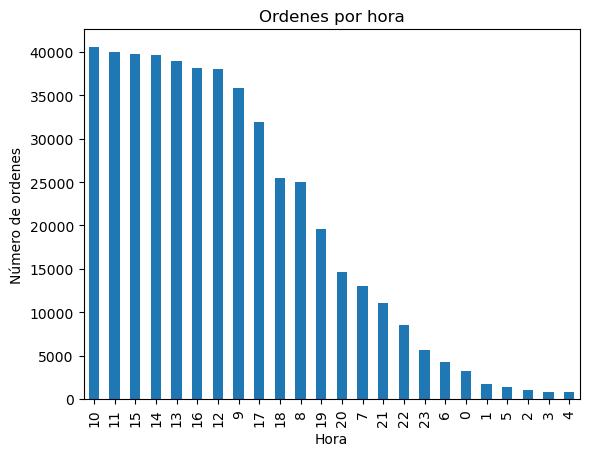

In [43]:
order_per_hour = df_orders['order_hour_of_day'].value_counts()
order_per_hour.plot(kind = 'bar',
                    title='Ordenes por hora',           
                    xlabel = 'Hora',
                    ylabel = 'Número de ordenes'
                   )

Escribe aquí tus 

Entgre 10 de la mañana y 4 de la tarde se hacen mas ordenes

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'Ordener por día'}, xlabel='Día', ylabel='Número de ordenes'>

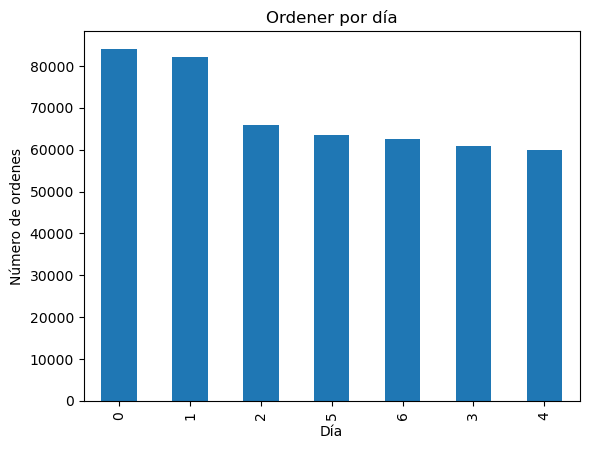

In [44]:
order_per_day = df_orders['order_dow'].value_counts()
order_per_day.plot(kind = 'bar',
                    title='Ordener por día',           
                    xlabel = 'Día',
                    ylabel = 'Número de ordenes'
                   )

Escribe aquí tus conclusiones

El domingo se hacen mas ordenes:84090


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [45]:
df_orders[df_orders['days_since_prior_order'] == 0]['days_since_prior_order'].count()


9589

In [46]:
df_orders[df_orders['days_since_prior_order'] == 30]['days_since_prior_order'].count()



51337

<Axes: title={'center': 'Días siguente pedido'}, xlabel='Días transcurridos', ylabel='Número de ordenes'>

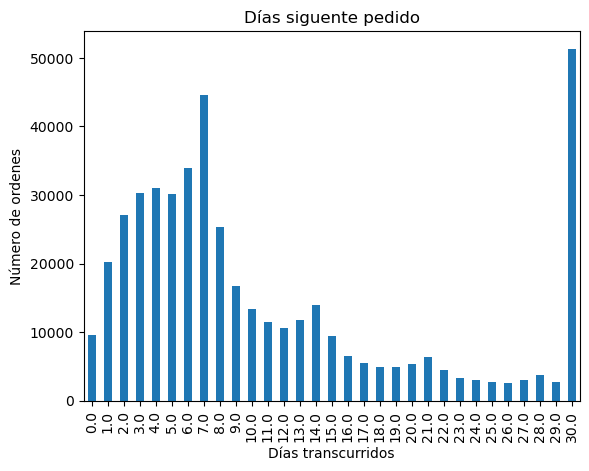

In [47]:
prior_order = df_orders.groupby('days_since_prior_order')['order_id'].count()
prior_order.plot(kind = 'bar',
                    title='Días siguente pedido',           
                    xlabel = 'Días transcurridos',
                    ylabel = 'Número de ordenes'
                   )

Escribe aquí tus conclusiones

38406 son pedidos de primera vez y 51 338 pedidos son tomadas hasta 30 dias despues


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [48]:
df_orders_wed = df_orders[df_orders['order_dow']==4]
df_orders_sat = df_orders[df_orders['order_dow']==6]

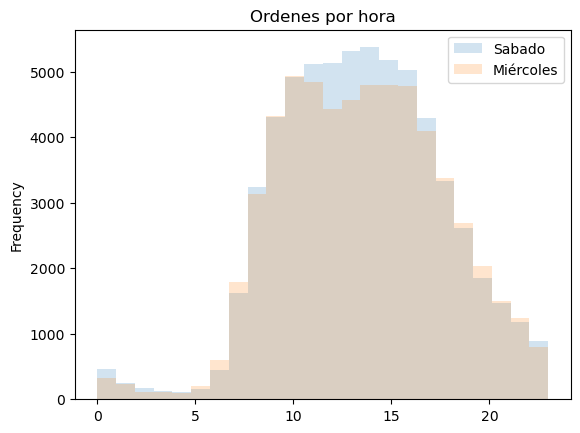

In [49]:
from matplotlib import pyplot as plt
df_orders_sat['order_hour_of_day'].plot(
        kind='hist',
        alpha=0.2,
        bins=24
)
df_orders_wed['order_hour_of_day'].plot(
        kind='hist',
        alpha=0.2,
        bins=24,
        title='Ordenes por hora',
        
        )

plt.legend(['Sabado','Miércoles'])

plt.show()

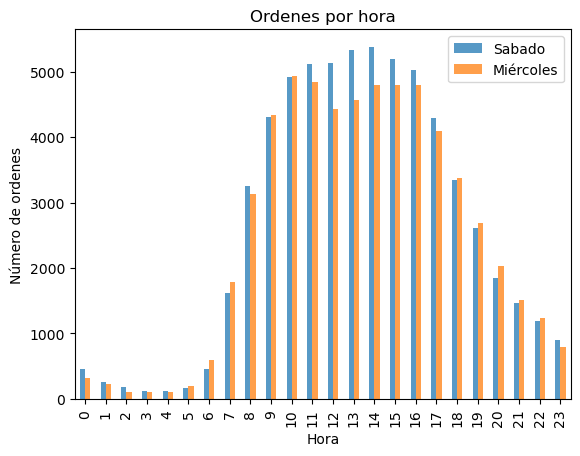

In [50]:
orders_per_hour_sat = df_orders_sat['order_hour_of_day'].value_counts().sort_index()
orders_per_hour_wed = df_orders_wed['order_hour_of_day'].value_counts().sort_index()
df = pd.DataFrame({'Sabado': orders_per_hour_sat, 'Miércoles': orders_per_hour_wed})
df.plot.bar(alpha=0.75)
plt.title('Ordenes por hora')
plt.xlabel('Hora')
plt.ylabel('Número de ordenes')
plt.legend()
plt.show()

Escribe aquí tus conclusiones

Hay mas ordenes los domingos que los miercoles principalmente a mediados de mes

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

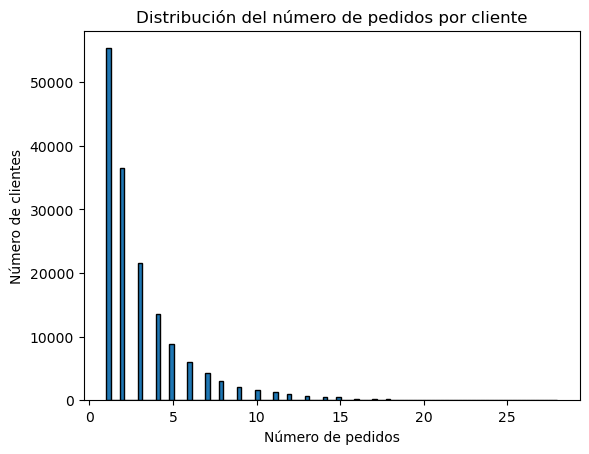

In [51]:
orders_per_customer = df_orders['user_id'].value_counts()
plt.hist(orders_per_customer, bins=100, edgecolor='black')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.show()


Escribe aquí tus conclusiones

En promedio los clientes piden alrededor de 3 articulos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
order = df_order_products[['product_id']]
product = df_products[['product_id', 'product_name']]
product_names = order.merge(product, on='product_id')
top_20_products = product_names.sort_values(by='product_id', ascending=False)
top_20 = top_20_products.value_counts()[:20]
top_20

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: count, dtype: int64

<Axes: title={'center': 'Top 20 products'}, xlabel='Products', ylabel='Sales'>

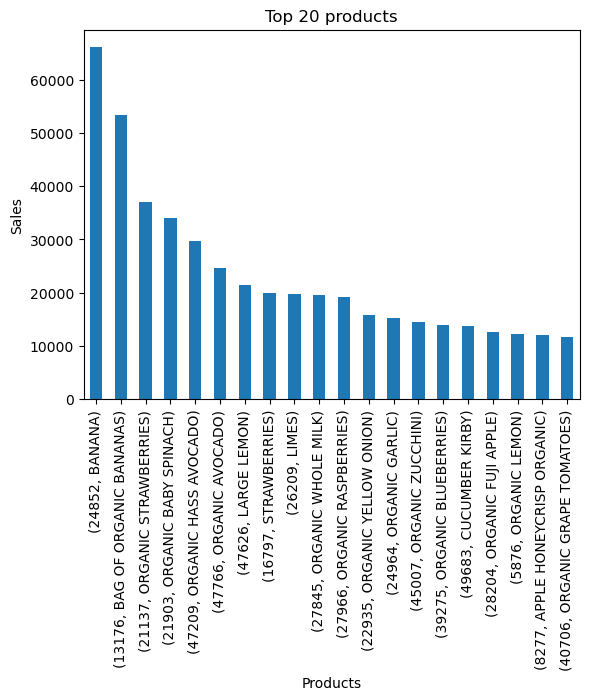

In [53]:
top_20.plot(kind='bar',
        title='Top 20 products',
        xlabel='Products',
        ylabel='Sales',
        
        ) 

Escribe aquí tus conclusiones

las bananas es el producto mas comprado

# [C] Difícil 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

La cantidad promedio de artículos por pedido es 10.242555205467886


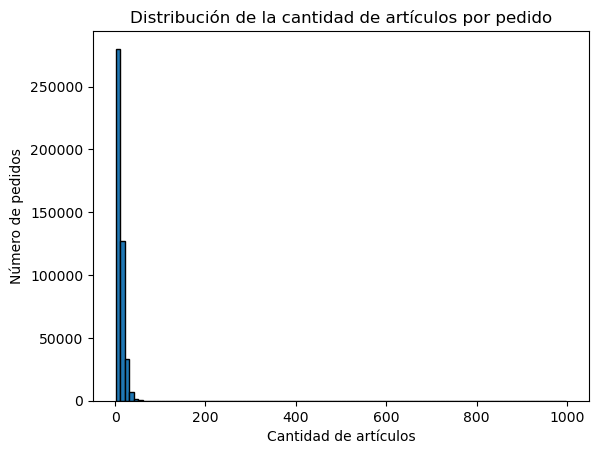

In [54]:
# Sumar los pedidos por cliente

items_per_order = df_order_products.groupby('order_id')['add_to_cart_order'].max()

average_items = items_per_order.mean()
print(f'La cantidad promedio de artículos por pedido es {average_items}')


plt.hist(items_per_order, bins=100, edgecolor='black')
plt.title('Distribución de la cantidad de artículos por pedido')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Número de pedidos')
plt.show()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]
reordered_counts = reordered_products['product_id'].value_counts()
top_20_reordered = reordered_counts[:20]
top_20_product_names = df_products[df_products['product_id'].isin(top_20_reordered.index)]['product_name']
print(top_20_product_names)

5875                ORGANIC LEMON
8276     APPLE HONEYCRISP ORGANIC
13175      BAG OF ORGANIC BANANAS
16796                STRAWBERRIES
21136        ORGANIC STRAWBERRIES
21902        ORGANIC BABY SPINACH
22934        ORGANIC YELLOW ONION
24851                      BANANA
24963              ORGANIC GARLIC
26208                       LIMES
27844          ORGANIC WHOLE MILK
27965         ORGANIC RASPBERRIES
28203          ORGANIC FUJI APPLE
39274         ORGANIC BLUEBERRIES
45006            ORGANIC ZUCCHINI
47208        ORGANIC HASS AVOCADO
47625                 LARGE LEMON
47765             ORGANIC AVOCADO
49234         ORGANIC HALF & HALF
49682              CUCUMBER KIRBY
Name: product_name, dtype: object


Escribe aquí tus conclusiones

Piden nuevamente productos orgánicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
total_orders = df_order_products['product_id'].value_counts()
reordered_orders = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()
reorder_ratio = reordered_orders / total_orders
print(reorder_ratio)


product_id
1        0.564286
2             NaN
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: count, Length: 45573, dtype: float64


Escribe aquí tus conclusiones

Casi todos se vueleven a pedir

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
id_order = df_order_products[['order_id','product_id','reordered']]
id_user = df_orders[['order_id', 'user_id']]
user_order = id_order.merge(id_user, on='order_id')

In [58]:
total_products = user_order.groupby('user_id')['product_id'].count()
reordered_products = user_order[user_order['reordered'] == 1].groupby('user_id')['product_id'].count()
reorder_ratio = reordered_products / total_products
reorder_ratio

user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: product_id, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

Casi todos los clientes repiten productos

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
add_order = df_order_products[['order_id','product_id','add_to_cart_order']]
add_user = df_orders[['order_id', 'user_id']]
add_user = add_order.merge(add_user, on='order_id')

In [60]:
first_added = add_user[add_user['add_to_cart_order'] == 1]
first_added_counts = first_added['product_id'].value_counts()
top_20_first_added = first_added_counts[:20]
top_20_product_names = df_products[df_products['product_id'].isin(top_20_first_added.index)]['product_name']
top_20_product_names

195                             SODA
5784     ORGANIC REDUCED FAT 2% MILK
12340                  HASS AVOCADOS
13175         BAG OF ORGANIC BANANAS
16796                   STRAWBERRIES
19659                   SPRING WATER
21136           ORGANIC STRAWBERRIES
21902           ORGANIC BABY SPINACH
24851                         BANANA
26208                          LIMES
27085                    HALF & HALF
27844             ORGANIC WHOLE MILK
27965            ORGANIC RASPBERRIES
38688       ORGANIC REDUCED FAT MILK
43351                    RASPBERRIES
44631     SPARKLING WATER GRAPEFRUIT
47208           ORGANIC HASS AVOCADO
47625                    LARGE LEMON
47765                ORGANIC AVOCADO
49234            ORGANIC HALF & HALF
Name: product_name, dtype: object

Escribe aquí tus conclusiones

a soda es lo primero que ponen en su carrito

### Conclusion general del proyecto:

El conjunto de datos proporcionado cuenta, con la información sobre las ordenes recibida (dia, hora usuario, etc.), los productos que se ordenan (nombre, id, categoría,etc.) y sobre la frecuencia de pedidos de los usuarios; por lo que se puede hacer un ánalisis general sobre de ventas y hábitos de los usuarios.

La tienda cuenta con 49694 productos, organizados en 21 departamentos y 134 categorías, solo una pequeña parte de ellos (1258) no cuentan con nombre, por lo que eso no afecta al análisis. Se le etiqueto como unknown.

En total se han tomado 478967 ordenes, donde 28819 pedidos no tienen información sobre si se el cliente pidio antes o no. Igual que en el caso de los nombres de los productos, esta falta de información, por ser muy poca, no afecta el análisis.

Sobre los habitos de compra de los usuarios, tenemos que los dias de mas venta son los domingos y lunes y las horas son entre 10 de la mañana y 4 de la tarde y la mayoria de los clientes prefieren hacer las compras mensuales, si repiten, pero la probabilidad de que eso pase apenas es del 57%.

En promedio, los clientes compran 64 productos por pedido, siendo los productos orgánicos los mas solicitados.

Con esta información,se podrian implementar mejoras como:
1. Hacer promociones en los dias menos concurridos para aumentar las ventas
2. Sustituir los productos menos pedidos
3. Ofrecer recompensas a clientes frecuentes
